<a href="https://colab.research.google.com/github/Psomi/Data-analysis-model/blob/main/Heart_Disease_Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **1. 연구 목표 설정**
>심장병 발병 여부와 높은 연관성을 가지는 요소들 알아보기

>이 데이터가 분석에 적절한지 알아보기, 적절하지 않다면 그 이유는 무엇인지 알아보기




### **2. Data 수집**
> - url : https://www.kaggle.com/code/hiiammrcat/heart-disease-data-understanding/data
> - Heart Disease Data Understanding
  - contain 18 variables

In [ ]:
import numpy as np
import pandas as pd
import os
os.chdir('/content/drive/MyDrive/박정배 교수님 수업')
df=pd.read_csv('heart_2020_cleaned.csv')


###**3. Data 분석 및 전처리**

In [ ]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
#BMI, Physical, MentalHealth, SleepTime 만 numerical변수이고 나머지는 모두 categorical 이다

In [ ]:
# 빈 데이터 있나 확인
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
#빈 데이터는 모델링 이용 시 에러 유발하므로 삭제
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
Yes_Value = df.HeartDisease.value_counts()[1]
print("The number of Yes Value has {}%".format(((Yes_Value/len(df))*100).round(2)))

The number of Yes Value has 8.56%


In [ ]:
# Yes가 전체 8.56%밖에 없는 bias가 매우 심한 데이터이다.

In [ ]:
# 범주형 변수와 숫자형 변수 구분하기
cat_features=[]
num_features=[]
for column, i in zip(df.columns,df.dtypes):
  if i==object:
    cat_features.append(column)
  else:
    num_features.append(column)

In [ ]:
cat_features

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [ ]:
df[cat_features].head(3)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No


In [ ]:
df_cat=df[cat_features].copy()

In [ ]:
# change categorical to numeric
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns = cat_features)

In [ ]:
df_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  float64
 1   Smoking           319795 non-null  float64
 2   AlcoholDrinking   319795 non-null  float64
 3   Stroke            319795 non-null  float64
 4   DiffWalking       319795 non-null  float64
 5   Sex               319795 non-null  float64
 6   AgeCategory       319795 non-null  float64
 7   Race              319795 non-null  float64
 8   Diabetic          319795 non-null  float64
 9   PhysicalActivity  319795 non-null  float64
 10  GenHealth         319795 non-null  float64
 11  Asthma            319795 non-null  float64
 12  KidneyDisease     319795 non-null  float64
 13  SkinCancer        319795 non-null  float64
dtypes: float64(14)
memory usage: 34.2 MB


In [ ]:
# check unique value of categorical data
for feature in df_cat_encoded.columns:
    print(feature)
    print(df_cat_encoded[feature].unique(),"\n")

HeartDisease
[0. 1.] 

Smoking
[1. 0.] 

AlcoholDrinking
[0. 1.] 

Stroke
[0. 1.] 

DiffWalking
[0. 1.] 

Sex
[0. 1.] 

AgeCategory
[ 7. 12.  9. 11.  4. 10.  8.  6.  5.  0.  3.  2.  1.] 

Race
[5. 2. 1. 0. 4. 3.] 

Diabetic
[2. 0. 1. 3.] 

PhysicalActivity
[1. 0.] 

GenHealth
[4. 1. 2. 3. 0.] 

Asthma
[1. 0.] 

KidneyDisease
[0. 1.] 

SkinCancer
[1. 0.] 



In [ ]:
# onehotencode로 변환된 범주형 변수와 숫자형 변수 결합한 새로운 df 만들기
df_numeric=pd.merge(df_cat_encoded,df[num_features],left_index=True, right_index=True)

In [ ]:
df_numeric.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,16.60,3.0,30.0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,26.58,20.0,30.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,24.21,0.0,0.0,6.0
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,23.71,28.0,0.0,8.0


###**4. 데이터 탐색**

In [ ]:
# Correlation 구하기
corr_matrix = df_numeric.corr()
corr_matrix

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,1.000000,0.107764,-0.032080,0.196835,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.041444,0.145197,0.093317,0.051803,0.170721,0.028591,0.008327
Smoking,0.107764,1.000000,0.111768,0.061226,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,0.024149,0.034920,0.033977,0.023118,0.115352,0.085157,-0.030336
AlcoholDrinking,-0.032080,0.111768,1.000000,-0.019858,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.002202,-0.028280,-0.005702,-0.038816,-0.017254,0.051282,-0.005065
Stroke,0.196835,0.061226,-0.019858,1.000000,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.038866,0.091167,0.048116,0.019733,0.137014,0.046467,0.011900
DiffWalking,0.201258,0.120074,-0.035328,0.174143,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,0.103222,0.153064,0.064840,0.181678,0.428373,0.152235,-0.022216
Sex,0.070040,0.085052,0.004200,-0.003091,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.069191,-0.009084,0.013434,0.026940,-0.040904,-0.100058,-0.015704
AgeCategory,0.233432,0.128331,-0.059528,0.137822,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,-0.058108,0.123190,0.263537,-0.004744,0.110763,-0.155506,0.104953
Race,0.034854,0.065499,0.036702,-0.003956,-0.015831,0.018855,0.163090,1.000000,-0.052216,0.056767,0.050344,-0.017975,0.003709,0.134780,-0.037424,-0.000847,-0.014491,0.035889
Diabetic,0.168553,0.053847,-0.057372,0.101518,0.205502,-0.013456,0.193745,-0.052216,1.000000,-0.133824,-0.010854,0.049827,0.142917,0.032523,0.202472,0.151361,0.032945,0.000449
PhysicalActivity,-0.100030,-0.097174,0.017487,-0.079455,-0.278524,0.048247,-0.121687,0.056767,-0.133824,1.000000,0.024418,-0.041526,-0.081827,-0.001328,-0.150616,-0.232283,-0.095808,0.003849


In [ ]:
# correlation matrix로는 한눈에 알아보기 힘들어서 heat map이용
# 상관관계가 높을수록 밝다

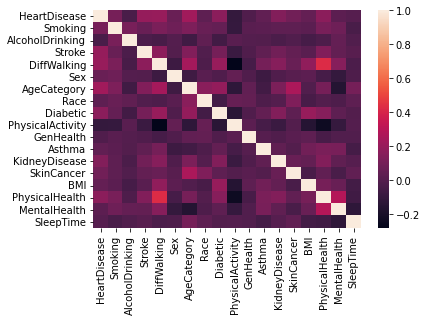

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix)
plt.show()


In [ ]:
# heat map으로도 뚜렷이 보이는 관계가 없어서 HearDisease와의 높은 상관계수 순으로 나열

In [ ]:
corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

In [ ]:
# Age가 가장 높은 상관계수를 가진다. 하지만 그렇게 크진 않다.

In [ ]:
# Convariance 구하기
cov_matrix=df_numeric.cov()

In [ ]:
cov_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

PhysicalHealth      0.379748
AgeCategory         0.232802
BMI                 0.092118
MentalHealth        0.063632
Diabetic            0.033786
DiffWalking         0.019471
Smoking             0.014842
Race                0.011820
Stroke              0.010494
Sex                 0.009786
KidneyDisease       0.007651
SkinCancer          0.007591
Asthma              0.003951
SleepTime           0.003345
AlcoholDrinking    -0.002261
GenHealth          -0.004749
PhysicalActivity   -0.011679
Name: HeartDisease, dtype: float64

In [ ]:
# correlation과 covariance를 구했을 때 상위 값들이 다르게 나왔는데 Agecategory가 가장 연관성이 높음을 알수 있다. 

###**5. 데이터 모델링**

In [ ]:
x=df_numeric.iloc[:,1:]
y=df_numeric['HeartDisease']

In [ ]:
x

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,16.60,3.0,30.0,5.0
1,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
2,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,26.58,20.0,30.0,8.0
3,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,24.21,0.0,0.0,6.0
4,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,23.71,28.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,27.41,7.0,0.0,6.0
319791,1.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,4.0,1.0,0.0,0.0,29.84,0.0,0.0,5.0
319792,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,24.24,0.0,0.0,6.0
319793,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,32.81,0.0,0.0,12.0


In [ ]:
# Feature-scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_scaled=sc.fit_transform(x)

In [ ]:
x_scaled.shape

(319795, 17)

In [ ]:
y.shape

(319795,)

In [ ]:
#train, test data로 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=27)

In [ ]:
X_train.shape

(255836, 17)

In [ ]:
X_test.shape

(63959, 17)

In [ ]:
#KNN modeling
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[57023,  1383],
       [ 4770,   783]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9037977454306665

###**6.결론**
> Heardisease와 다른 요소들과의 연관성을 알아볼 때 AgeCategory를 제외하곤 상관관계가 거의 없었다. <br>
> 데이터의 bias가 굉장히 심하다. 왜냐하면 HeartDisease가 Yes인 데이터가 전체의 8%밖에 되지 않기 때문이다. <br>
> 따라서, 이 데이터는 분류 모델로 HeartDisease를 예측하기에 적절치 않다. 다 No라고 예측하여도 정확도가 높게 나오기 때문이다.